# Most Favorable Labor Training for Refugees for Economic Self-sufficiency

## Quick Highlights

- The majority of Refugees arriving are of working age (21+).

- The Education and Health industry is the dominating labor sector for almost every State in the US.

## Background

Thousands of refugees arrive in the United States every year, leaving their home countries for fear of persecution due to race, religion, nationality, political opinion, or membership in a particular social group. Once approved as a refugee by the USCIS, they will receive a loan for their travel to the U.S., a cultural orientation by a third-party organization, and medical and cash assistance eligibility. Otherwise, these individuals are responsible for achieving their own economic self-sufficiency, including job attainment and a place of residence. It's also important to note, that immigrants' foreign education degrees are often overlooked by employers or not recognized in the U.S. Due to this, as well as other barriers (such as having little to working knowledge of the English language), foreign-born workers are more likely to be employed in physical labor occupations such as service, construction, and maintenance, where their annual income is historically lower than other labor industries. This project aims to find which types of labor training will be most effective for refugees to achieve financial empowerment (Source).

## Datasets

Our data analysis focused on three data sources: The Bureau of Labor Statistics (BLS) Employment Labor Force, the Department of Homeland Security's (DHS) Refugee and Asylee statistics, and the Worldwide Refugee Admissions Processing System (ç) Arrivals by State and Nationality.

### BLS Employment status of the experienced civilian labor force, by industry, 2021 annual averages

Shape: 204 rows, 17 columns

Data uses estimates from the Current Population Survey, which is revised each year by the U.S. Census Bureau. This dataset specifically includes totals for the civilian workforce, those who are employed, and the unemployment rate. The labor industries included in this dataset are Mining, quarrying, oil and gas extraction, Construction, Manufacturing - Total, Manufacturing - Durable Goods, Manufacturing - NonDurable Goods, Wholesale and retail trade, Transportation and utilities, Information, Financial Activities, Professional and business/services, Education and health services, Leisure and hospitality, Other services, Public administration, and Agriculture and related industries. 

For the purpose of this project, we will only be using the subset data of the number employed in each industry, and the industries with unreliable data (Mining/gas extraction, Information, and Agriculture industries) will be removed for a more accurate outlook of the job market.

### DHS Refugee and Asylee statistics (2021)

Shape: 41 rows, 6 columns

This data is obtained from the WRAPS of the Bureau of Population, Refugees, and Migration of the U.S. Department of State on the numbers and demographic profiles of persons admitted to the United States as refugees, and those applying for and granted asylum status during a given fiscal year. We will be using Table 15d which contains the refugee information regarding their age group, sex, marriage status, and number of children. 

For the purpose of this project, we will only be utilizing the broad age groups for refugees.

### Refugee Processing Center's Refugee Arrivals by State and Nationality (FY 2022)

Shape: 707 rows, 14 columns

WRAPS is a computer system that is currently used by the Department of State Bureau of Population, Refugees, and Migration to process and track the movement of refugees from various countries to the U.S. for resettlement. Reports are generated monthly and an annual report is released every October when the new Fiscal Year begins. This dataset contains monthly state totals of how many refugees are incoming and their countries of origin.

## Refugee Demographics

In the most recent Fiscal Year (2021 - 2022) the US accepted 25,465 refugees across 50 states.

### Countries of Origin

shows the top countries that were represented in refugees admitted. There were56 Countries represented by refugees that have arrived. The top countries shown had around 500 + representatives, with the majority arriving from the Democratic Republic of Congo, which is currently experiencing numerous human rights violations from political turmoil, similar to the other countries in this list.

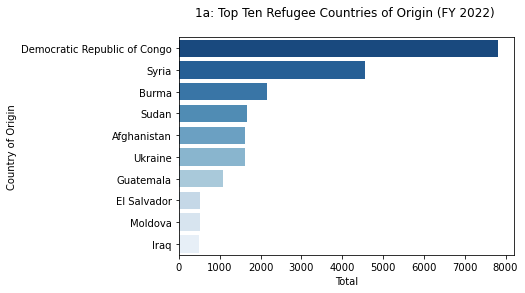

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading data
coo = pd.read_csv('data/refugee_state.csv')

#clean
coo['PA Nationality'] = coo['PA Nationality'].replace({'Dem . Rep . Con ..': 'Democratic Republic of Congo',
                                     'Central African ..': 'Central African Republic',
                                     'Republic of Sou ..': 'Republic of South Africa',
                                     'Sri Lanka ( Ceyl ..': 'Sri Lanka (Ceylon)',
                                     'Korea , North': 'North Korea'})
coo = coo.rename(columns = {'Affiliate State Name' : 'State',
                        'PA Nationality' : 'Country of Origin'})

coo = coo.replace(np.nan, 0)

#adding total column
coo['Total'] = coo.sum(axis = 1)

#more cleaning
coo = coo.drop(columns = ['State', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])

#find top countries of origin
coo_top = coo.groupby('Country of Origin').sum().sort_values(ascending = False, by = 'Total').head(10).reset_index()

sns.barplot(data = coo_top, x = 'Total', y = 'Country of Origin', orient = 'h', palette="Blues_r") \
            .set(title = '1a: Top Ten Refugee Countries of Origin (FY 2022) \n');


### Age groups

The bar chart below demonstrates that the majority of the refugees arriving in the states are above the age of 21, meaning they are of working age. In the United States, minors are required to attend an educational institution until they are between 16 - 18, depending on the state in which they are residing (See more here). Since the majority of the individuals are over that age group, this indicates that the majority of refugees are ready to enter directly into the workforce.

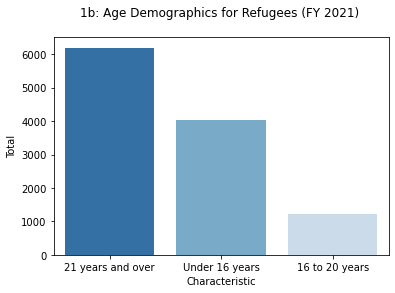

In [2]:
#load data
age = pd.read_csv("data/ref_demo.csv", header=4)
age = age[24:27]

#clean
age["Total"] = age["Total"].replace(",", "", regex=True).astype(int)
age = age.drop(columns=["Unnamed: 2", "Spouses2", "Children", "Other"]).sort_values(by = 'Total', ascending = False)

sns.barplot(data = age, x = 'Characteristic', y = "Total", palette= 'Blues_r') \
             .set(title = '1b: Age Demographics for Refugees (FY 2021) \n');


### Current US State of Residence

California and Texas significantly receive more refugees than any other state.

In [11]:
import plotly.express as px

#load data
state_res = pd.read_csv('data/refugee_state.csv')

#clean
state_res = state_res.replace(np.nan, '0')
state_res = state_res.rename(columns = {'Affiliate State Name' : 'State'})
state_res = state_res.drop(columns = 'PA Nationality')
months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
state_res[months] = state_res[months].astype(int)

#create total column
state_res['Total'] = state_res.sum(axis = 1)
state_res = state_res.drop(columns = months) #once total calculated, drop month columns

#df with total for all states
state_total = state_res.groupby('State').sum().sort_values(by='Total', ascending = False)

#data prepping
state_abbv = pd.read_csv('https://worldpopulationreview.com/static/states/abbr-name-list.csv')

state_total = state_total.reset_index()
state_total_code = pd.merge(state_abbv, state_total, left_on='name', right_on='State')
state_total_code = state_total_code.drop(columns='name')
state_total_code

#create choropleth map
fig = px.choropleth(data_frame = state_total_code,
                    locations= 'abbreviation', 
                    locationmode="USA-states", 
                    color= state_total_code['Total'],
                    color_continuous_scale= 'Blues', 
                    hover_name= 'State',
                    hover_data= ['Total'],
                    scope="usa",
                    title = '1c: U.S States Receiving Refugees')
fig.show()

Below are the top ten states with the highest Refugee acceptance in 2022

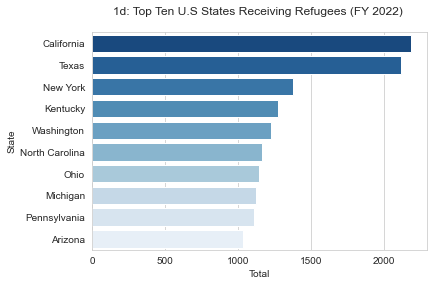

In [12]:
#df with top ten states
top_states = state_total.head(10).reset_index()

sns.barplot(data = top_states, x = 'Total', y = 'State', orient = 'h', palette="Blues_r") \
            .set(title = '1d: Top Ten U.S States Receiving Refugees (FY 2022) \n');

## Labor Market

In this section, we will be analyzing the top labor industries across all states in the U.S. The labor industries we will be looking at are the: Construction, Manufacturing - Durable Goods, Manufacturing - NonDurable Goods, Wholesale and retail trade, Transportation and utilities, Financial activities, Professional and business/services, Education and health services, Leisure and hospitality, Other services, and Public administration industry. Two industries were excluded from our analysis, Mining / Oil extraction and Agriculture, due to the lack of accurate data for these labor fields.

### Across the US

the top employment industry in most states is Education and Health Services, followed by Wholesale retail trade.

/Users/valentinasatizabal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



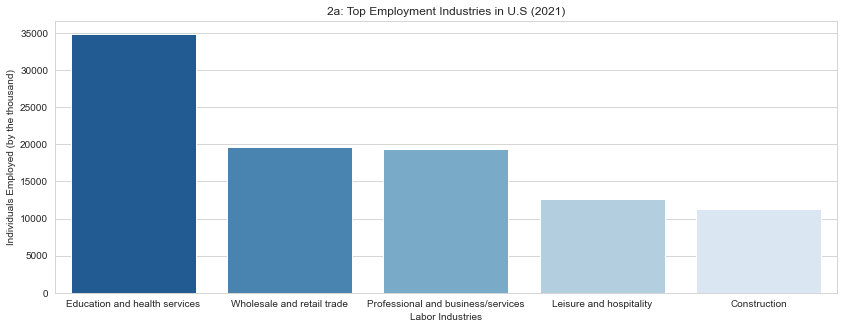

In [13]:
#load in data
labor = pd.read_csv('data/Labor Geo Profiles.csv', header = 3)

#data cleaning
labor = labor.rename(columns = {'Employment status\nand state' : 'Status and State', 
                                'Mining, quar-\nrying, and\noil and gas\nextraction' : 'Mining, quarrying, and oil and gas extraction', 
                                'Manufacturing' : "Manufacturing - Total", 
                                'Unnamed: 5' : 'Manufacturing - Durable Goods', 
                                'Unnamed: 6' : 'Manufacturing - NonDurable Goods',
                                'Wholesale\nand retail\ntrade' : 'Wholesale and retail trade', 
                                'Transport-\nation and\nutilities' : 'Transportation and utilities',
                                'Financial\nactivities' : "Financial activities",
                                'Professional\nand business\nservices' : 'Professional and business/services',
                                'Education\nand health\nservices' : 'Education and health services', 
                                'Leisure\nand\nhospitality' : 'Leisure and hospitality',
                                'Other\nservices' : 'Other services', 
                                'Public\nadmini-\nstration' : 'Public administration',
                                'Agriculture\nand related\nindustries' : 'Agriculture and related industries'})
labor = labor.dropna().reset_index()
labor = labor.drop(columns = 'index')
labor = labor.replace('(2)-', np.nan)
labor = labor.replace(',', '', regex = True).reset_index()
industries = ['Total', 'Mining, quarrying, and oil and gas extraction', 'Construction', 'Manufacturing - Total', 'Manufacturing - Durable Goods', 'Manufacturing - NonDurable Goods', 'Wholesale and retail trade', 'Transportation and utilities', 'Information', 'Financial activities', 'Professional and business/services', 'Education and health services', 'Leisure and hospitality', 'Other services', 'Public administration', 'Agriculture and related industries']

#extracting only employed + cleaning
labor_employed = labor[51:102]
labor_employed[industries] = labor_employed[industries].astype(float)
labor_employed = labor_employed.drop(columns = ['index']).reset_index()
labor_employed = labor_employed.drop(columns = ['index', 'Total', 'Mining, quarrying, and oil and gas extraction', 'Manufacturing - Total', 'Agriculture and related industries', 'Information'])

#labor_employed
top5_US_industries = pd.melt(labor_employed, id_vars = 'Status and State').groupby('variable').sum().sort_values(by='value', ascending = False).head(5).reset_index()
top5_US_industries = top5_US_industries.rename(columns={'value' : 'Individuals Employed (by the thousand)', 'variable' : 'Labor Industries'})

#plotting
plt.figure(figsize=(14, 5))
sns.set_style("whitegrid")
sns.barplot(data = top5_US_industries, x = 'Labor Industries', y = 'Individuals Employed (by the thousand)', palette="Blues_r") \
            .set(title = '2a: Top Employment Industries in U.S (2021)');

Below is a look into the most popular state for each industry.

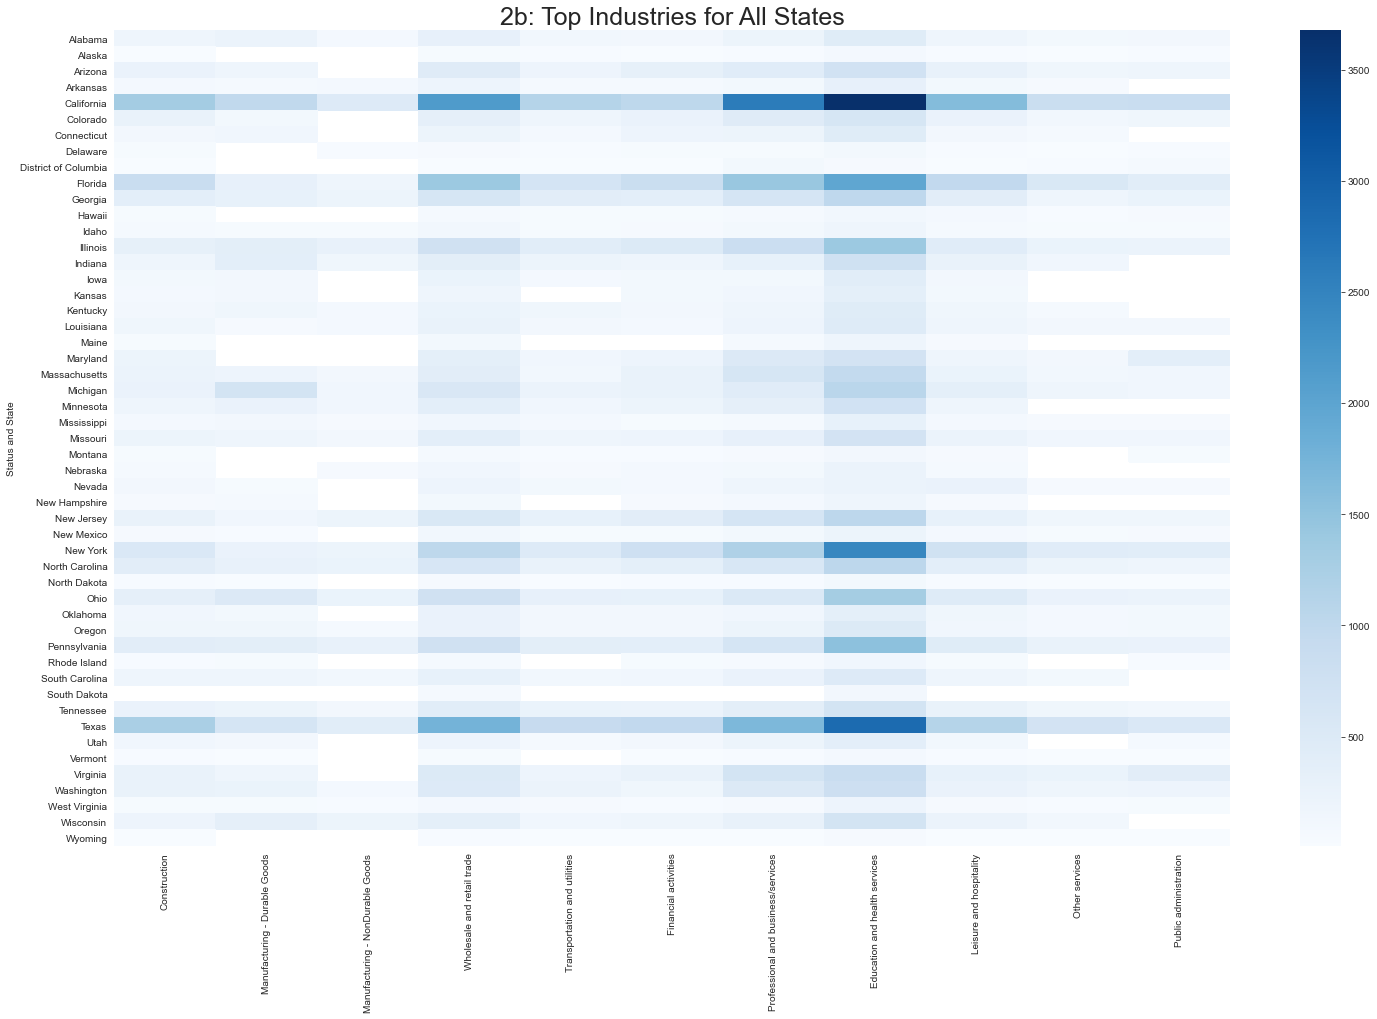

In [8]:
labor_employed_index = labor_employed.set_index('Status and State')


plt.subplots(figsize=(25,15))
plt.title("2b: Top Industries for All States", fontsize =25)
sns.heatmap(labor_employed_index, cmap = 'Blues', xticklabels=True, yticklabels=True);

### In Top States Receiving Refugees

shows the same trend as above, the Education and Health Services sector shows to be the top industries in the top states receiving Refugees.

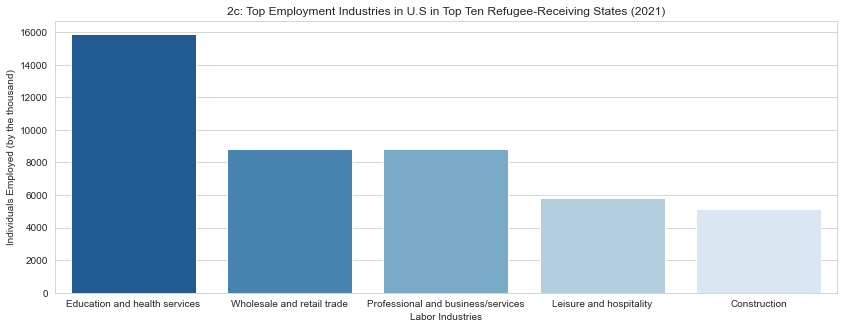

In [14]:
#top 10 states
top10_labor = labor_employed.loc[[4, 43, 32, 17, 47, 33, 35, 22, 38, 2]]

#top10_labor
top10_labor_index = top10_labor.set_index('Status and State')
top5_top10_industries = pd.melt(top10_labor, id_vars = 'Status and State').groupby('variable').sum().sort_values(by='value', ascending = False).head(5).reset_index()
top5_top10_industries = top5_top10_industries.rename(columns = {'variable':'Labor Industries', 'value':'Individuals Employed (by the thousand)'})

#plotting
plt.figure(figsize=(14, 5))
sns.set_style("whitegrid")
sns.barplot(data = top5_top10_industries, x = 'Labor Industries', y = 'Individuals Employed (by the thousand)', palette="Blues_r") \
            .set(title = '2c: Top Employment Industries in U.S in Top Ten Refugee-Receiving States (2021)');

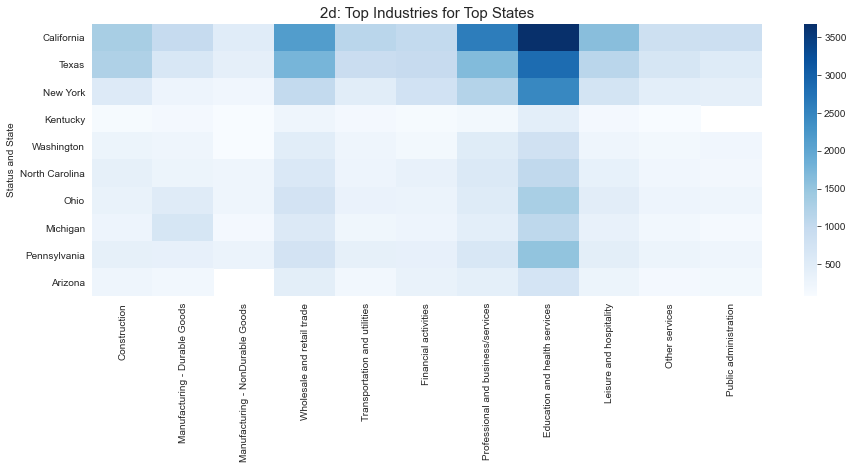

In [10]:
#plot heatmap
plt.subplots(figsize=(15,5))
plt.title("2d: Top Industries for Top States", fontsize =15)
sns.heatmap(top10_labor_index, cmap = 'Blues', xticklabels=True, yticklabels=True);

## Conclusion

Given that most refugees in the U.S. are eligible to work, it would be most beneficial for these individuals to enter an industry that will provide them with room for growth in the long term. For this reason, it would be most favorable for these individuals to be trained in a subsector of the Health and Education industry. A list of jobs and educational attainment can be found on the Bureau of Labor Statistics website - some examples include Opticians, Vet Assistants, and Teacher Assistants. It's important to note that in order to grow in this industry, additional education achievements may be necessary.

Note: DHS has not released data for the 2022 Fiscal Year, therefore 2021 data was used in this project. In the future, numbers will need to be updated to better reflect the current demographics of Refugees in the U.S.